<a target="_blank" href="https://colab.research.google.com/github/IngCarlaPezzone/ml/blob/main/Mlops/1.%20Introduction%20to%20Machine%20Learning%20in%20Production/Semana_2/C1W2_Ungraded_Lab_Birds_Cats_Dogs_corregida.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Semana 2 - Laboratorio no calificado: Un viaje a través de los datos

Bienvenido al laboratorio no calificado de la semana 2 de Ingeniería de Aprendizaje Automático para Producción. **El paradigma detrás del Aprendizaje Profundo se enfrenta ahora a un cambio de modelo-céntrico a datos-céntrico.** En este laboratorio verás cómo las complejidades de los datos afectan al resultado de tus modelos. Para mostrarte hasta dónde te llevará aplicar cambios en los datos sin abordar el modelo, utilizarás un único modelo en todo momento: una simple Red Neural Convolucional (CNN). Mientras entrena este modelo, el viaje le llevará a abordar problemas comunes: desequilibrio de clases y sobreajuste. A medida que se vayan solucionando estos problemas, el laboratorio le guiará a través de útiles herramientas de diagnóstico y métodos para mitigar estos problemas comunes.

-------
-------

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

# Week 2 - Ungraded Lab: A journey through Data

Welcome to the ungraded lab for week 2 of Machine Learning Engineering for Production. **The paradigm behind Deep Learning is now facing a shift from model-centric to data-centric.** In this lab you will see how data intricacies affect the outcome of your models. To show you how far it will take you to apply data changes without addressing the model, you will be using a single model throughout: a simple Convolutional Neural Network (CNN). While training this model the journey will take you to address common problems: class imbalance and overfitting. As you navigate these issues, the lab will walk you through useful diagnosis tools and methods to mitigate these common problems.

-------
-------

### **NOTAS IMPORTANTES ANTES DE COMENZAR EL LABORATORIO**

Una vez abierto en Colab, haga clic en el botón "Conectar" en la esquina superior derecha de la pantalla para conectarse a un tiempo de ejecución para ejecutar este laboratorio.


**NOTA 1:**

Para este laboratorio tienes la opción de entrenar los modelos tú mismo (esto toma alrededor de 20 minutos con la GPU habilitada para cada modelo) o utilizar las versiones pre-entrenadas que ya se proporcionan. Hay un total de 3 CNNs que requieren entrenamiento y aunque algunos parámetros han sido ajustados para proporcionar un tiempo de entrenamiento más rápido (como `steps_per_epoch` y `validation_steps` que han sido fuertemente reducidos) esto puede resultar en un largo tiempo de ejecución de este laboratorio en lugar de pensar en lo que se observa.

Para acelerar las cosas, hemos proporcionado versiones preentrenadas guardadas de cada modelo junto con su respectivo historial de entrenamiento. Le recomendamos que utilice estas versiones preentrenadas para ahorrar tiempo. Sin embargo, también consideramos que entrenar un modelo es una experiencia de aprendizaje importante, especialmente si no lo ha hecho antes. **Si quieres realizar este entrenamiento por ti mismo, también se proporciona el código para replicar el entrenamiento. En este caso la GPU es absolutamente necesaria, así que asegúrate de que está activada.**

Para asegurarse de que su runtime es GPU puede ir a Runtime -> Change runtime type -> Seleccione GPU en el menú y luego pulse SAVE

- Nota: Es posible que sea necesario reiniciar el puede ser necesario.

- Colab le dirá si es necesario reiniciar - puede hacerlo desde la opción Runtime -> Restart Runtime en el menú desplegable.

**Si decide utilizar las versiones preentrenadas asegúrese de que no está utilizando una GPU ya que no es necesario y puede impedir que otros usuarios tengan acceso a una.** Para comprobarlo, vaya a Runtime -> Change runtime type -> Seleccione None en el menú y luego pulse SAVE.

**NOTA 2:**

Colab **no** garantiza el acceso a una GPU. Esto depende de la disponibilidad de estos recursos. Sin embargo **no es muy común que se le niegue el acceso a la GPU**. Si esto le ocurre, puede seguir ejecutando este laboratorio sin entrenar los modelos usted mismo. Si realmente quieres hacer el entrenamiento pero se te niega una GPU, intenta cambiar el tiempo de ejecución a una GPU después de un par de horas.

Para saber más sobre las políticas de Colab consulta esta [FAQ](https://research.google.com/colaboratory/faq.html).

-----------
-----------

¡Empecemos!

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### **IMPORTANT NOTES BEFORE STARTING THE LAB**

Once opened in Colab, click on the "Connect" button on the upper right side corner of the screen to connect to a runtime to run this lab.


**NOTE 1:**

For this lab you get the option to either train the models yourself (this takes around 20 minutes with GPU enabled for each model) or to use pretrained versions which are already provided. There are a total of 3 CNNs that require training and although some parameters have been tuned to provide a faster training time (such as `steps_per_epoch` and `validation_steps` which have been heavily lowered) this may result in a long time spent running this lab rather than thinking about what you observe.

To speed things up we have provided saved pre-trained versions of each model along with their respective training history. We recommend you use these pre-trained versions to save time. However we also consider that training a model is an important learning experience especially if you haven't done this before. **If you want to perform this training by yourself, the code for replicating the training is provided as well. In this case the GPU is absolutely necessary, so be sure that it is enabled.**

To make sure your runtime is GPU you can go to Runtime -> Change runtime type -> Select GPU from the menu and then press SAVE

- Note: Restarting the runtime may
be required.

- Colab will tell you if restarting is necessary -- you can do this from Runtime -> Restart Runtime option in the dropdown.

**If you decide to use the pretrained versions make sure you are not using a GPU as it is not required and may prevent other users from getting access to one.** To check this, go to Runtime -> Change runtime type -> Select None from the menu and then press SAVE.

**NOTE 2:**

Colab **does not** guarantee access to a GPU. This depends on the availability of these resources. However **it is not very common to be denied GPU access**. If this happens to you, you can still run this lab without training the models yourself. If you really want to do the training but are denied a GPU, try switching the runtime to a GPU after a couple of hours.

To know more about Colab's policies check out this [FAQ](https://research.google.com/colaboratory/faq.html).

-----------
-----------

Let's get started!

In [1]:
import os
import shutil
import random
import zipfile
import tarfile
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# To ignore some warnings about Image metadata that Pillow prints out
import warnings
warnings.filterwarnings("ignore")

Antes de continuar, descargue los dos conjuntos de datos utilizados en el laboratorio, así como los modelos preentrenados y los historiales:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Before you move on, download the two datasets used in the lab, as well as the pretrained models and histories:

In [2]:
# Download datasets

# Cats and dogs
!wget https://storage.googleapis.com/mlep-public/course_1/week2/kagglecatsanddogs_3367a.zip

# Caltech birds
!wget https://storage.googleapis.com/mlep-public/course_1/week2/CUB_200_2011.tar

--2022-09-30 22:48:11--  https://storage.googleapis.com/mlep-public/course_1/week2/kagglecatsanddogs_3367a.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/zip]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   238MB/s    in 3.3s    

2022-09-30 22:48:15 (240 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]

--2022-09-30 22:48:15--  https://storage.googleapis.com/mlep-public/course_1/week2/CUB_200_2011.tar
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125

## Una historia de datos

Para guiarte en este laboratorio hemos preparado una narración que simula un escenario de la vida real:

Supongamos que te han encargado crear un modelo que clasifique imágenes de gatos, perros y pájaros. Para ello te decides por una arquitectura CNN sencilla, ya que se sabe que las CNN tienen un buen rendimiento en la clasificación de imágenes. Probablemente estés familiarizado con dos conjuntos de datos ampliamente utilizados: "gatos contra perros" y "pájaros de Caltech". Ambos conjuntos de datos están disponibles en `Tensforflow Datasets (TFDS)`. Sin embargo, usted decide NO utilizar `TFDS` ya que el laboratorio requiere que modifique los datos y combine los dos conjuntos de datos en uno solo. 

## Combinar los conjuntos de datos

Las imágenes en bruto de estos conjuntos de datos se pueden encontrar en las siguientes rutas:


<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

## A story of data

To guide you through this lab we have prepared a narrative that simulates a real life scenario:

Suppose you have been tasked to create a model that classifies images of cats, dogs and birds. For this you settle on a simple CNN architecture, since CNN's are known to perform well for image classification. You are probably familiar with two widely used datasets: `cats vs dogs`, and `caltech birds`. As a side note both datasets are available through `Tensforflow Datasets (TFDS)`. However, you decide NOT to use `TFDS` since the lab requires you to modify the data and combine the two datasets into one. 

## Combining the datasets

The raw images in these datasets can be found within the following paths:


In [3]:
cats_and_dogs_zip = 'kagglecatsanddogs_3367a.zip'
caltech_birds_tar = 'CUB_200_2011.tar'

base_dir = 'tmp/data'
os.makedirs(base_dir)

El siguiente paso es extraer los datos en un directorio de su elección, `base_dir` en este caso.

Tenga en cuenta que las imágenes de `gatos contra perros` están en formato de archivo `zip` mientras que las imágenes de `pájaros de Caltech` vienen en un archivo `tar`.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

The next step is extracting the data into a directory of choice, `base_dir` in this case.

Note that the `cats vs dogs` images are in `zip` file format while the `caltech birds` images come in a `tar` file.

In [4]:
with zipfile.ZipFile(cats_and_dogs_zip, 'r') as my_zip:
    my_zip.extractall(base_dir)

In [5]:
with tarfile.open(caltech_birds_tar, 'r') as my_tar:
    my_tar.extractall(base_dir)

Para las imágenes de gatos y perros no es necesario ningún preprocesamiento adicional, ya que todos los ejemplares de una misma clase se encuentran en un mismo directorio: `PetImages\Cat` y `PetImages\Dog` respectivamente. Comprobemos cuántas imágenes hay disponibles para cada categoría:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

For the cats and dogs images no further preprocessing is needed as all exemplars of a single class are located in one directory: `PetImages\Cat` and `PetImages\Dog` respectively. Let's check how many images are available for each category:

In [6]:
base_dogs_dir = os.path.join(base_dir, 'PetImages/Dog')
base_cats_dir = os.path.join(base_dir,'PetImages/Cat')


print(f"There are {len(os.listdir(base_dogs_dir))} images of dogs")
print(f"There are {len(os.listdir(base_cats_dir))} images of cats")

There are 12501 images of dogs
There are 12501 images of cats


La organización del conjunto de datos de imágenes de aves es bastante diferente. Este conjunto de datos se utiliza habitualmente para clasificar especies de aves, por lo que hay un directorio para cada especie. Vamos a tratar todas las especies de aves como una sola clase. Esto requiere mover todas las imágenes de aves a un único directorio (se utilizará `PetImages/Bird` por coherencia). Esto se puede hacer ejecutando la siguiente celda:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

The Bird images dataset organization is quite different. This dataset is commonly used to classify species of birds so there is a directory for each species. Let's treat all species of birds as a single class. This requires moving all bird images to a single directory (`PetImages/Bird` will be used for consistency). This can be done by running the next cell:

In [7]:
raw_birds_dir = 'tmp/data/CUB_200_2011/images'
base_birds_dir = os.path.join(base_dir,'PetImages/Bird')
os.makedirs(base_birds_dir)

for subdir in os.listdir(raw_birds_dir):
    subdir_path = os.path.join(raw_birds_dir, subdir)
    for image in os.listdir(subdir_path):
        shutil.move(os.path.join(subdir_path, image), os.path.join(base_birds_dir))

print(f"There are {len(os.listdir(base_birds_dir))} images of birds")

There are 11788 images of birds


¡Resulta que hay un número similar de imágenes para cada clase que se intenta predecir! Muy bien.

Veamos rápidamente una imagen de cada clase que se intenta predecir.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

It turns out that there is a similar number of images for each class you are trying to predict! Nice!
    
Let's take a quick look at an image of each class you are trying to predict.

Sample cat image:


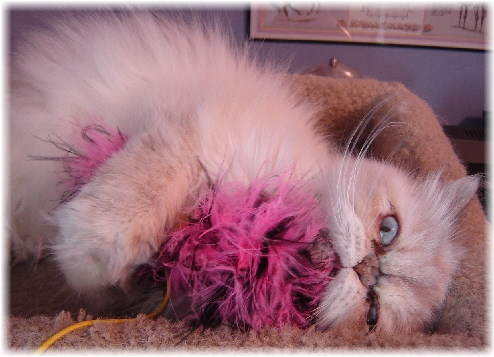


Sample dog image:


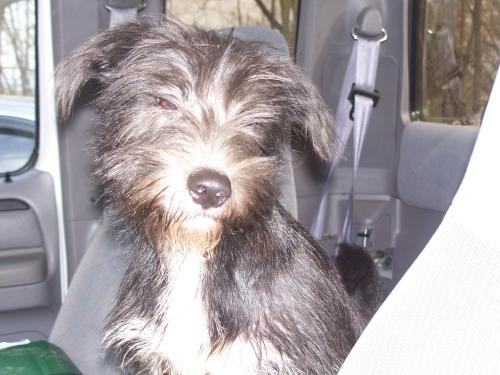


Sample bird image:


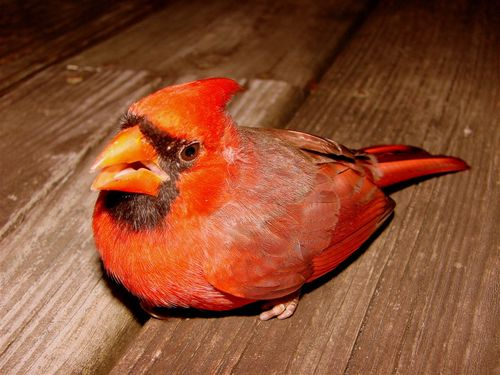

In [9]:
from IPython.display import Image, display

print("Sample cat image:")
display(Image(filename=f"{os.path.join(base_cats_dir, os.listdir(base_cats_dir)[0])}"))
print("\nSample dog image:")
display(Image(filename=f"{os.path.join(base_dogs_dir, os.listdir(base_dogs_dir)[0])}"))
print("\nSample bird image:")
display(Image(filename=f"{os.path.join(base_birds_dir, os.listdir(base_birds_dir)[0])}"))

## Entrenar / Evaluar la división

Antes de entrenar el modelo es necesario dividir los datos en conjuntos de `entrenamiento` y `evaluación`. Para el entrenamiento, hemos elegido la interfaz de programación de aplicaciones (API) de [`Keras`](https://keras.io) que incluye la funcionalidad de leer imágenes de varios directorios. La forma más fácil de dividir los datos es crear un directorio diferente para cada división de cada clase.

Ejecuta la siguiente celda para crear los directorios para los conjuntos de entrenamiento y evaluación.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

## Train / Evaluate Split
    
Before training the model you need to split the data into `training` and `evaluating` sets. For training, we have chosen the [`Keras`](https://keras.io) application programming interface (API) which includes functionality to read images from  various directories. The easier way to split the data is to create a different directory for each split of each class.

Run the next cell to create the directories for training and evaluating sets.

In [10]:
train_eval_dirs = ['train/cats', 'train/dogs', 'train/birds',
                   'eval/cats', 'eval/dogs', 'eval/birds']

for dir in train_eval_dirs:
    if not os.path.exists(os.path.join(base_dir, dir)):
        os.makedirs(os.path.join(base_dir, dir))

Ahora, vamos a definir una función que moverá un porcentaje de imágenes de una carpeta de origen a una carpeta de destino según se desee para generar las divisiones de entrenamiento y evaluación:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Now, let's define a function that will move a percentage of images from an origin folder to a destination folder as desired to generate the training and evaluation splits:

In [11]:
def move_to_destination(origin, destination, percentage_split):
    num_images = int(len(os.listdir(origin))*percentage_split)
    for image_name, image_number in zip(sorted(os.listdir(origin)), range(num_images)):
        shutil.move(os.path.join(origin, image_name), destination)

Y ahora está listo para llamar a la función anterior y dividir los datos:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

And now you are ready to call the previous function and split the data:

In [13]:
# Move 70% of the images to the train dir
move_to_destination(base_cats_dir, os.path.join(base_dir, 'train/cats'), 0.7)
move_to_destination(base_dogs_dir, os.path.join(base_dir, 'train/dogs'), 0.7)
move_to_destination(base_birds_dir, os.path.join(base_dir, 'train/birds'), 0.7)


# Move the remaining images to the eval dir
move_to_destination(base_cats_dir, os.path.join(base_dir, 'eval/cats'), 1)
move_to_destination(base_dogs_dir, os.path.join(base_dir, 'eval/dogs'), 1)
move_to_destination(base_birds_dir, os.path.join(base_dir, 'eval/birds'), 1)

Algo importante a mencionar es que tal y como está actualmente su conjunto de datos tiene algunos problemas que impedirán el entrenamiento y la evaluación del modelo. Principalmente:

1. Algunas imágenes están corruptas y tienen cero bytes.
2. El archivo zip Gatos vs. Perros incluye un archivo `.db` para cada clase que debe ser eliminado.

Si no arreglas esto antes de entrenar obtendrás errores relacionados con estos problemas y el entrenamiento fallará. Las imágenes de cero bytes no son imágenes válidas y Keras te lo hará saber cuando se alcancen estos archivos. De manera similar, los archivos `.db` no son imágenes válidas. **Es una buena práctica asegurarse siempre de que estás enviando archivos con las especificaciones correctas a tu algoritmo de entrenamiento antes de empezar a ejecutarlo** ya que estos problemas podrían no encontrarse de inmediato y tendrás que resolverlos y empezar el entrenamiento de nuevo.

La ejecución de los siguientes comandos `bash` en el directorio base resolverá estos problemas:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Something important to mention is that as it currently stands your dataset has some issues that will prevent model training and evaluation. Mainly:

1. Some images are corrupted and have zero bytes.
2. Cats vs dogs zip file included a `.db` file for each class that needs to be deleted.

If you didn't fix this before training you will get errors regarding these issues and training will fail. Zero-byte images are not valid images and Keras will let you know once these files are reached. In a similar way `.db` files are not valid images. **It is a good practice to always make sure that you are submitting files with the correct specifications to your training algorithm before start running it** as these issues might not be encountered right away and you will have to solve them and start training again.

Running the following `bash` commands in the base directory will resolve these issues:

In [14]:
!find tmp/data/ -size 0 -exec rm {} +
!find tmp/data/ -type f ! -name "*.jpg" -exec rm {} +

El primer comando elimina todos los archivos de cero bytes del sistema de archivos. El segundo elimina cualquier archivo que no tenga una extensión `.jpg`. 

Esto también sirve para recordar el poder de bash. Aunque podrías lograr el mismo resultado con código Python, bash te permite hacer esto mucho más rápido. Si no estás familiarizado con bash o algún otro lenguaje tipo shell te animamos a que aprendas algo de él ya que es una herramienta muy útil para la manipulación de datos.

Comprobemos cuántas imágenes tiene disponibles para cada división y clase después de eliminar las imágenes corruptas:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

The first command removes all zero-byte files from the filesystem. The second one removes any file that does not have a `.jpg` extension. 

This also serves as a reminder of the power of bash. Although you could achieve the same result with Python code, bash allows you to do this much quicker. If you are not familiar with bash or some other shell-like language we encourage you to learn some of it as it is a very useful tool for data manipulation purposes.

Let's check how many images you have available for each split and class after you remove the corrupted images:

In [15]:
print(f"There are {len(os.listdir(os.path.join(base_dir, 'train/cats')))} images of cats for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'train/dogs')))} images of dogs for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'train/birds')))} images of birds for training\n")

print(f"There are {len(os.listdir(os.path.join(base_dir, 'eval/cats')))} images of cats for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'eval/dogs')))} images of dogs for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'eval/birds')))} images of birds for evaluation")

There are 8750 images of cats for training
There are 8749 images of dogs for training
There are 8251 images of birds for training

There are 3749 images of cats for evaluation
There are 3750 images of dogs for evaluation
There are 3537 images of birds for evaluation


Resulta que muy pocos archivos presentaban los problemas mencionados anteriormente. Es una buena noticia, pero también es un recordatorio de que pequeños problemas con el conjunto de datos pueden afectar inesperadamente al proceso de entrenamiento. En este caso, 4 archivos de imagen no válidos le habrán impedido entrenar el modelo. 

En la mayoría de los casos, entrenar modelos de Deep Learning es una tarea que requiere mucho tiempo, así que asegúrate de tener todo listo antes de empezar este proceso.


## ¡Un problema inesperado!

¡Enfrentémonos al primer problema de la vida real en esta narración! Hubo un corte de energía en tu oficina y algunos discos duros se dañaron y como resultado de eso, muchas de las imágenes de `perros` y `pájaros` se han borrado. De hecho, sólo el 20% de las imágenes de perros y el 10% de las de pájaros han sobrevivido.

Para simular este escenario, vamos a crear rápidamente un nuevo directorio llamado `imbalanced` y copiar sólo las proporciones mencionadas anteriormente para cada clase.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

It turns out that very few files presented the issues mentioned above. That's good news but it is also a reminder that small problems with the dataset might unexpectedly affect the training process. In this case, 4 non valid image files will have prevented you from training the model. 

In most cases training Deep Learning models is a time intensive task, so be sure to have everything in place before starting this process.


## An unexpected issue!

Let's face the first real life issue in this narrative! There was a power outage in your office and some hard drives were damaged and as a result of that, many of the images for `dogs` and `birds` have been erased. As a matter of fact, only 20% of the dog images and 10% of the bird images survived.

To simulate this scenario, let's quickly create a new directory called `imbalanced` and copy only the proportions mentioned above for each class.

In [16]:
for dir in train_eval_dirs:
    if not os.path.exists(os.path.join(base_dir, 'imbalanced/'+dir)):
        os.makedirs(os.path.join(base_dir, 'imbalanced/'+dir))

In [17]:
# Very similar to the one used before but this one copies instead of moving
def copy_with_limit(origin, destination, percentage_split):
    num_images = int(len(os.listdir(origin))*percentage_split)
    for image_name, image_number in zip(sorted(os.listdir(origin)), range(num_images)):
        shutil.copy(os.path.join(origin, image_name), destination)

# Perform the copying
copy_with_limit(os.path.join(base_dir, 'train/cats'), os.path.join(base_dir, 'imbalanced/train/cats'), 1)
copy_with_limit(os.path.join(base_dir, 'train/dogs'), os.path.join(base_dir, 'imbalanced/train/dogs'), 0.2)
copy_with_limit(os.path.join(base_dir, 'train/birds'), os.path.join(base_dir, 'imbalanced/train/birds'), 0.1)

copy_with_limit(os.path.join(base_dir, 'eval/cats'), os.path.join(base_dir, 'imbalanced/eval/cats'), 1)
copy_with_limit(os.path.join(base_dir, 'eval/dogs'), os.path.join(base_dir, 'imbalanced/eval/dogs'), 0.2)
copy_with_limit(os.path.join(base_dir, 'eval/birds'), os.path.join(base_dir, 'imbalanced/eval/birds'), 0.1)

# Print number of available images
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/train/cats')))} images of cats for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/train/dogs')))} images of dogs for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/train/birds')))} images of birds for training\n")

print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/eval/cats')))} images of cats for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/eval/dogs')))} images of dogs for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/eval/birds')))} images of birds for evaluation")

There are 8750 images of cats for training
There are 1749 images of dogs for training
There are 825 images of birds for training

There are 3749 images of cats for evaluation
There are 750 images of dogs for evaluation
There are 353 images of birds for evaluation


Por ahora no hay una solución rápida ni clara para la pérdida accidental de archivos. Así que decide seguir adelante y entrenar el modelo con las imágenes restantes.

## Selección del modelo

Sigamos adelante y creemos una arquitectura de modelo y definamos una función de pérdida, un optimizador y unas métricas de rendimiento aprovechando la API de keras:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

For now there is no quick or clear solution to the accidental file loss. So you decide to keep going and train the model with the remaining images.
    
## Selecting the model

Let's go ahead and create a model architecture and define a loss function, optimizer and performance metrics leveraging keras API:

In [18]:
from tensorflow.keras import layers, models, optimizers

def create_model():
    # A simple CNN architecture based on the one found here: https://www.tensorflow.org/tutorials/images/classification
    model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
    ])


    # Compile the model
    model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      optimizer=optimizers.Adam(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    return model

Y vamos a imprimir un resumen del modelo como comprobación rápida.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

And let's print out a model summary as a quick check.

In [19]:
# Create a model to use with the imbalanced dataset
imbalanced_model = create_model()

# Print the model's summary
print(imbalanced_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

Para entrenar el modelo se utilizará el ImageDataGenerator de Keras, que tiene funcionalidades incorporadas para alimentar fácilmente su modelo con datos de imágenes crudas, reescaladas o incluso aumentadas.

Otra funcionalidad interesante dentro de ImageDataGenerator es el método `flow_from_directory` que permite leer las imágenes que se necesiten desde un directorio raíz. Este método necesita los siguientes argumentos:

- `directorio`: Ruta al directorio raíz donde se almacenan las imágenes.
- `tamaño_objetivo`: Las dimensiones a las que se redimensionarán todas las imágenes encontradas. Como las imágenes vienen en todo tipo de resoluciones, es necesario estandarizar su tamaño. Se utiliza 150x150 pero otros valores también deberían funcionar bien.
- `tamaño_del_lote`: Número de imágenes que el generador produce cada vez que se le pide un siguiente lote. Aquí se utiliza 32.
- `class_mode`: Cómo se representan las etiquetas. Aquí se utiliza "binario" para indicar que las etiquetas serán 1D. Esto se hace por compatibilidad con las métricas de pérdida y evaluación utilizadas al compilar el modelo.

Si quieres aprender más sobre el uso del ImageDataGenerator de Keras, consulta este [tutorial](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

For training the model you will be using Keras' ImageDataGenerator, which has built-in functionalities to easily feed your model with raw, rescaled or even augmented image data.

Another cool functionality within ImageDataGenerator is the `flow_from_directory` method which allows to read images as needed from a root directory. This method needs the following arguments:

- `directory`: Path to the root directory where the images are stored.
- `target_size`: The dimensions to which all images found will be resized. Since images come in all kinds of resolutions, you need to standardize their size. 150x150 is used but other values should work well too.
- `batch_size`: Number of images the generator yields everytime it is asked for a next batch. 32 is used here.
- `class_mode`: How the labels are represented. Here "binary" is used to indicate that labels will be 1D. This is done for compatibility with the loss and evaluation metrics used when compiling the model.

If you want to learn more about using Keras' ImageDataGenerator, check this [tutorial](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# No data augmentation for now, only normalizing pixel values
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Point to the imbalanced directory
train_generator = train_datagen.flow_from_directory(
        'tmp/data/imbalanced/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'tmp/data/imbalanced/eval',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 11324 images belonging to 3 classes.
Found 4852 images belonging to 3 classes.


Hagamos una rápida comprobación de cordura para inspeccionar que ambos generadores (el de entrenamiento y el de validación) utilizan las mismas etiquetas para cada clase:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Let's do a quick sanity check to inspect that both generators (training and validation) use the same labels for each class:

In [21]:
print(f"labels for each class in the train generator are: {train_generator.class_indices}")
print(f"labels for each class in the validation generator are: {validation_generator.class_indices}")

labels for each class in the train generator are: {'birds': 0, 'cats': 1, 'dogs': 2}
labels for each class in the validation generator are: {'birds': 0, 'cats': 1, 'dogs': 2}


# Entrenamiento de una CNN con datos de clase desequilibrada

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>
    
# Training a CNN with class imbalanced data


In [ ]:
#Run only if you want to train the model yourself (this takes around 20 mins with GPU enabled)

imbalanced_history = imbalanced_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=80)

Epoch 1/50
100/100 [==============================] - 24s 232ms/step - loss: 0.7209 - sparse_categorical_accuracy: 0.7666 - val_loss: 0.6491 - val_sparse_categorical_accuracy: 0.7770
Epoch 2/50
100/100 [==============================] - 23s 228ms/step - loss: 0.6212 - sparse_categorical_accuracy: 0.7847 - val_loss: 0.5599 - val_sparse_categorical_accuracy: 0.8035
Epoch 3/50
100/100 [==============================] - 22s 223ms/step - loss: 0.5614 - sparse_categorical_accuracy: 0.7875 - val_loss: 0.5113 - val_sparse_categorical_accuracy: 0.8121
Epoch 4/50
100/100 [==============================] - 22s 221ms/step - loss: 0.5188 - sparse_categorical_accuracy: 0.8066 - val_loss: 0.4836 - val_sparse_categorical_accuracy: 0.8203
Epoch 5/50
100/100 [==============================] - 22s 223ms/step - loss: 0.5105 - sparse_categorical_accuracy: 0.8056 - val_loss: 0.4767 - val_sparse_categorical_accuracy: 0.8191
Epoch 6/50
100/100 [==============================] - 22s 223ms/step - loss: 0.4848 -

In [33]:
!wget -q -P /content/history-imbalanced/ https://storage.googleapis.com/mlep-public/course_1/week2/history-imbalanced/history-imbalanced.csv


In [35]:
!wget -q -P /content/model-imbalanced/ https://storage.googleapis.com/mlep-public/course_1/week2/model-imbalanced/saved_model.pb


In [37]:
!wget -q -P /content/model-imbalanced/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-imbalanced/variables/variables.index


In [41]:
!wget -q -P /content/model-imbalanced/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-imbalanced/variables/variables.data-00000-of-00001


In [39]:
!pwd

/content


In [42]:
imbalanced_history = pd.read_csv('/content/history-imbalanced/history-imbalanced.csv')
imbalanced_model = tf.keras.models.load_model('/content/model-imbalanced')

To analyze the model performance properly, it is important to track different metrics such as accuracy and loss function along the training process. Let's define a helper function to handle the metrics through the training history,depending on the method you previously selected:

In [22]:
def get_training_metrics(history):
  
    # This is needed depending on if you used the pretrained model or you trained it yourself
    if not isinstance(history, pd.core.frame.DataFrame):
      history = history.history

    acc = history['sparse_categorical_accuracy']
    val_acc = history['val_sparse_categorical_accuracy']

    loss = history['loss']
    val_loss = history['val_loss']

    return acc, val_acc, loss, val_loss

Ahora, vamos a trazar las métricas y las pérdidas para cada época de entrenamiento a medida que el proceso de entrenamiento progresa. 

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Now, let's plot the metrics and losses for each training epoch as the training process progresses. 

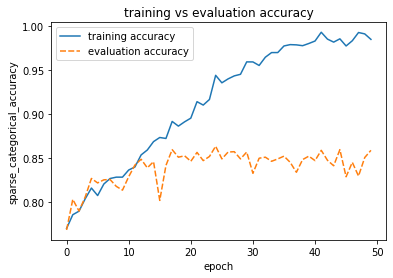

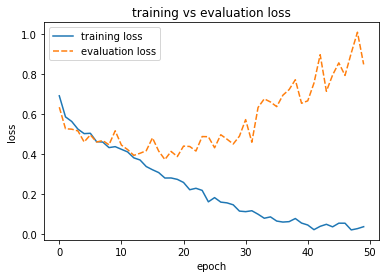

In [43]:
def plot_train_eval(history):
    acc, val_acc, loss, val_loss = get_training_metrics(history)

    acc_plot = pd.DataFrame({"training accuracy":acc, "evaluation accuracy":val_acc})
    acc_plot = sns.lineplot(data=acc_plot)
    acc_plot.set_title('training vs evaluation accuracy')
    acc_plot.set_xlabel('epoch')
    acc_plot.set_ylabel('sparse_categorical_accuracy')
    plt.show()

    print("")

    loss_plot = pd.DataFrame({"training loss":loss, "evaluation loss":val_loss})
    loss_plot = sns.lineplot(data=loss_plot)
    loss_plot.set_title('training vs evaluation loss')
    loss_plot.set_xlabel('epoch')
    loss_plot.set_ylabel('loss')
    plt.show()



plot_train_eval(imbalanced_history)

A partir de estos dos gráficos es bastante evidente que el modelo está sobreajustando los datos de entrenamiento. Sin embargo, la precisión de la evaluación sigue siendo bastante alta. Tal vez el desequilibrio de clases no sea un problema tan grande después de todo. Tal vez sea demasiado bueno para ser cierto. 

Profundicemos un poco más y calculemos algunas métricas adicionales para explorar si el desequilibrio de clases está impidiendo que el modelo funcione bien. En concreto, vamos a comparar: la puntuación de precisión, la puntuación de precisión equilibrada y la matriz de confusión.  La información sobre los cálculos de las puntuaciones de precisión se proporciona en la documentación de [sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). Para refrescar las ideas sobre lo que es una matriz de confusión consulte [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix).

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

From these two plots is quite evident that the model is overfitting the training data. However, the evaluation accuracy is still pretty high. Maybe class imbalance is not such a big issue after all. Perhaps this is too good to be true. 

Let's dive a little deeper, and compute some additional metrics to explore if the class imbalance is hampering the model to perform well. In particular, let's compare: the accuracy score,  the accuracy score balanced, and the confusion matrix.  Information on the accuracy scores calculations is provided in the [sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) documentation. To refresh ideas on what is a confusion matrix check [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix).

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score

In [46]:
# Use the validation generator without shuffle to easily compute additional metrics
val_gen_no_shuffle = test_datagen.flow_from_directory(
    'tmp/data/imbalanced/eval',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 4852 images belonging to 3 classes.


In [47]:
# Get the true labels from the generator
y_true = val_gen_no_shuffle.classes

# Use the model to predict (will take a couple of minutes)
predictions_imbalanced = imbalanced_model.predict(val_gen_no_shuffle)

# Get the argmax (since softmax is being used)
y_pred_imbalanced = np.argmax(predictions_imbalanced, axis=1)

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_true, y_pred_imbalanced)}")

# Print balanced accuracy score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_true, y_pred_imbalanced)}")

Accuracy Score: 0.855111294311624
Balanced Accuracy Score: 0.7417486453422518


Comparando las métricas de "exactitud" y "exactitud equilibrada", el desequilibrio de clases empieza a ser evidente. Ahora vamos a calcular la "matriz de confusión" de las predicciones. Obsérvese que el desequilibrio de clases también está presente en el conjunto de evaluación, por lo que la matriz de confusión mostrará una mayoría abrumadora para los gatos.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Comparing the `accuracy` and `balanced accuracy` metrics, the class imbalance starts to become apparent. Now let's compute the `confusion matrix` of the predictions. Notice that the class imbalance is also present in the evaluation set so the confusion matrix will show an overwhelming majority for cats.

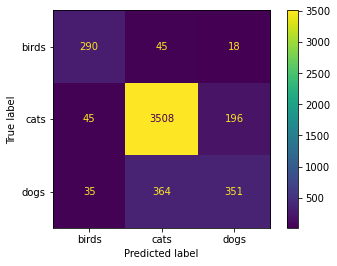

In [48]:
imbalanced_cm = confusion_matrix(y_true, y_pred_imbalanced)
ConfusionMatrixDisplay(imbalanced_cm, display_labels=['birds', 'cats', 'dogs']).plot(values_format="d")

In [49]:
misclassified_birds = (imbalanced_cm[1,0] + imbalanced_cm[2,0])/np.sum(imbalanced_cm, axis=0)[0]
misclassified_cats = (imbalanced_cm[0,1] + imbalanced_cm[2,1])/np.sum(imbalanced_cm, axis=0)[1]
misclassified_dogs = (imbalanced_cm[0,2] + imbalanced_cm[1,2])/np.sum(imbalanced_cm, axis=0)[2]

print(f"Proportion of misclassified birds: {misclassified_birds*100:.2f}%")
print(f"Proportion of misclassified cats: {misclassified_cats*100:.2f}%")
print(f"Proportion of misclassified dogs: {misclassified_dogs*100:.2f}%")

Proportion of misclassified birds: 21.62%
Proportion of misclassified cats: 10.44%
Proportion of misclassified dogs: 37.88%


El desequilibrio de clases es un problema real que, si no se detecta a tiempo, da la impresión errónea de que su modelo está funcionando mejor de lo que realmente lo hace. Por esta razón, es importante basarse en varias métricas que hacen un mejor trabajo en la captura de este tipo de problemas. **En este caso, la métrica estándar de "precisión" es engañosa** y da una falsa sensación de que el modelo funciona mejor de lo que realmente lo hace.

Para demostrar este punto, consideremos un modelo que sólo predice gatos:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Class imbalance is a real problem that if not detected early on, gives the wrong impression that your model is performing better than it actually is. For this reason,  is important to rely on several metrics that do a better job at capturing these kinds of issues. **In this case the standard `accuracy` metric is misleading** and provides a false sense that the model is performing better than it actually is.

To prove this point further consider a model that only predicts cats:

In [50]:
# Predict cat for all images
all_cats = np.ones(y_true.shape)

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_true, all_cats)}")

# Print balanced accuracy score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_true, all_cats)}")

Accuracy Score: 0.7726710634789777
Balanced Accuracy Score: 0.3333333333333333


Si sólo se observa la métrica de la "exactitud", el modelo parece funcionar bastante bien, ya que la clase mayoritaria es la misma que el modelo predice siempre.

Hay varias técnicas para tratar el desequilibrio de clases. Una muy popular es `SMOTE`, que sobremuestrea las clases minoritarias creando datos sintéticos. Sin embargo, estas técnicas están fuera del alcance de este laboratorio.

Las métricas anteriores se calcularon con desequilibrio de clases tanto en los conjuntos de entrenamiento como en los de evaluación. Si te preguntas cómo se comporta el modelo con desequilibrio de clases sólo en el conjunto de entrenamiento, ejecuta la siguiente celda para ver la matriz de confusión con clases equilibradas en el conjunto de evaluación:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

If you only look at the `accuracy` metric the model seems to be working fairly well, since the majority class is the same that the model always predicts.

There are several techniques to deal with class imbalance. A very popular one is `SMOTE`, which oversamples the minority classes by creating syntethic data. However, these techniques are outside the scope of this lab.

The previous metrics were computed with class imbalance both on the training and evaluation sets. If you are wondering how the model performed with class imbalance only on the training set run the following cell to see the confusion matrix with balanced classes in the evaluation set:


Found 11036 images belonging to 3 classes.


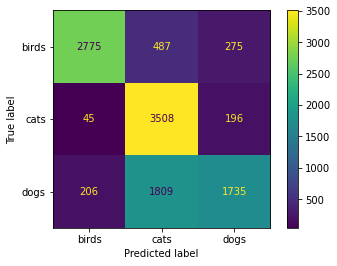

In [51]:
# Use the validation generator without shuffle to easily compute additional metrics
val_gen_no_shuffle = test_datagen.flow_from_directory(
    'tmp/data/eval',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

# Get the true labels from the generator
y_true = val_gen_no_shuffle.classes

# Use the model to predict (will take a couple of minutes)
predictions_imbalanced = imbalanced_model.predict(val_gen_no_shuffle)

# Get the argmax (since softmax is being used)
y_pred_imbalanced = np.argmax(predictions_imbalanced, axis=1)

# Confusion matrix
imbalanced_cm = confusion_matrix(y_true, y_pred_imbalanced)
ConfusionMatrixDisplay(imbalanced_cm, display_labels=['birds', 'cats', 'dogs']).plot(values_format="d")

# Entrenamiento con el conjunto de datos completo

Por el momento y siguiendo la narración, supongamos que un colega tuyo tuvo la precaución de guardar una copia de seguridad del conjunto de datos completo en su almacenamiento en la nube. Ahora puedes intentar entrenar sin el problema del desequilibrio de clases, ¡qué alivio!

Ahora que tiene el conjunto de datos completo es el momento de volver a intentarlo sin sufrir el desequilibrio de clases. **En general, recoger más datos es beneficioso para los modelos.**

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

# Training with the complete dataset

For the time being and following the narrative, assume that a colleague of yours was careful enough to save a backup of the complete dataset in her cloud storage. Now you can try training without the class imbalance issue, what a relief!

Now that you have the complete dataset it is time to try again without suffering from class imbalance. **In general, collecting more data is beneficial for models!**

In [52]:
# Create a model to use with the balanced dataset
balanced_model = create_model()

In [53]:
# Still no data augmentation, only re-scaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generators now point to the complete dataset
train_generator = train_datagen.flow_from_directory(
        'tmp/data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'tmp/data/eval',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 25750 images belonging to 3 classes.
Found 11036 images belonging to 3 classes.


In [ ]:
# Run only if you want to train the model yourself (this takes around 20 mins with GPU enabled)

balanced_history = balanced_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=80)

Epoch 1/50
100/100 [==============================] - 24s 238ms/step - loss: 0.9936 - sparse_categorical_accuracy: 0.4563 - val_loss: 0.8938 - val_sparse_categorical_accuracy: 0.5562
Epoch 2/50
100/100 [==============================] - 24s 235ms/step - loss: 0.7998 - sparse_categorical_accuracy: 0.6084 - val_loss: 0.7390 - val_sparse_categorical_accuracy: 0.6383
Epoch 3/50
100/100 [==============================] - 23s 233ms/step - loss: 0.7267 - sparse_categorical_accuracy: 0.6625 - val_loss: 0.6998 - val_sparse_categorical_accuracy: 0.6660
Epoch 4/50
100/100 [==============================] - 23s 234ms/step - loss: 0.6785 - sparse_categorical_accuracy: 0.6722 - val_loss: 0.7405 - val_sparse_categorical_accuracy: 0.6641
Epoch 5/50
100/100 [==============================] - 23s 231ms/step - loss: 0.6597 - sparse_categorical_accuracy: 0.7041 - val_loss: 0.6158 - val_sparse_categorical_accuracy: 0.7223
Epoch 6/50
100/100 [==============================] - 23s 233ms/step - loss: 0.6185 -

In [54]:
!wget -q -P /content/model-balanced/ https://storage.googleapis.com/mlep-public/course_1/week2/model-balanced/saved_model.pb
!wget -q -P /content/model-balanced/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-balanced/variables/variables.data-00000-of-00001
!wget -q -P /content/model-balanced/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-balanced/variables/variables.index
!wget -q -P /content/history-balanced/ https://storage.googleapis.com/mlep-public/course_1/week2/history-balanced/history-balanced.csv

In [59]:
balanced_history = pd.read_csv('/content/history-balanced/history-balanced.csv')
balanced_model = tf.keras.models.load_model('/content/model-balanced')

Comprobemos cómo es ahora la comparación entre "precisión" y "precisión equilibrada":

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Let's check how the `accuracy` vs `balanced accuracy` comparison looks like now:

In [55]:
# Use the validation generator without shuffle to easily compute additional metrics
val_gen_no_shuffle = test_datagen.flow_from_directory(
    'tmp/data/eval',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 11036 images belonging to 3 classes.


In [56]:
# Get the true labels from the generator
y_true = val_gen_no_shuffle.classes

# Use the model to predict (will take a couple of minutes)
predictions_balanced = balanced_model.predict(val_gen_no_shuffle)

# Get the argmax (since softmax is being used)
y_pred_balanced = np.argmax(predictions_balanced, axis=1)

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_true, y_pred_balanced)}")

# Print balanced accuracy score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_true, y_pred_balanced)}")

Accuracy Score: 0.3569227981152592
Balanced Accuracy Score: 0.35106876613017707


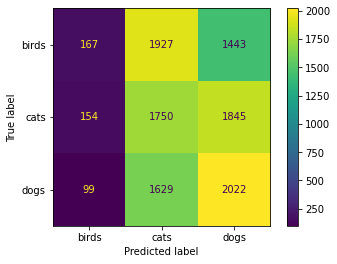

In [57]:
balanced_cm = confusion_matrix(y_true, y_pred_balanced)
ConfusionMatrixDisplay(balanced_cm, display_labels=['birds', 'cats', 'dogs']).plot(values_format="d")

Ambas métricas basadas en la precisión son ahora muy similares. La matriz de confusión también se ve mucho mejor que antes. Esto sugiere que el desequilibrio de clases se ha mitigado con éxito añadiendo más datos a las clases que antes no estaban muestreadas.

Ahora que ya puedes confiar en la métrica de `precisión`, vamos a trazar el historial de entrenamiento:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Both accuracy-based metrics are very similar now. The confusion matrix also looks way better than before. This suggests that class imbalance has been successfully mitigated by adding more data to the previously undersampled classes.

Now that you now that you can trust the `accuracy` metric, let's plot the training history:

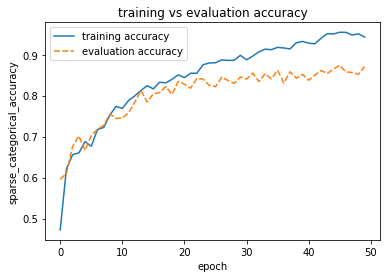

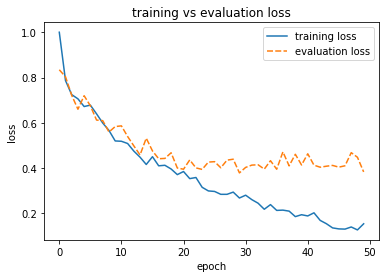

In [60]:
plot_train_eval(balanced_history)

Esto parece mucho mejor que en el caso de desequilibrio. Sin embargo, el sobreajuste sigue presente.

¿Se te ocurre alguna forma de resolver este problema? Si está familiarizado con las CNN, podría pensar en añadir capas de salida. Esta intuición es correcta, pero por el momento decides seguir con el mismo modelo y sólo cambiar los datos para ver si es posible mitigar el sobreajuste de esta manera.

Otra posible solución es aplicar técnicas de aumento de datos. Todo tu equipo está de acuerdo en que este es el camino a seguir, así que decides probarlo a continuación.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

This looks much better than for the imbalanced case! However, overfitting is still present.

Can you think of ways to address this issue? If you are familiar with CNN's you might think of adding `dropout` layers. This intuition is correct but for the time being you decide to stick with the same model and only change the data to see if it is possible to mitigate overfitting in this manner.

Another possible solution is to apply data augmentation techniques. Your whole team agrees this is the way to go so you decide to try this next!

# Entrenamiento con aumento de datos

El aumento de imágenes es una técnica en la que se crean nuevas versiones de las imágenes que se tienen a mano, aplicando transformaciones geométricas. Estas transformaciones pueden variar desde: acercar y alejar, rotar o incluso voltear las imágenes. De este modo, se obtiene un conjunto de datos de entrenamiento que expone al modelo a una mayor variedad de imágenes. Esto ayuda a explorar más el espacio de características y, por tanto, a reducir las posibilidades de sobreajuste. 

También es una idea muy natural, ya que si se realizan ligeros (o a veces no tan ligeros) cambios en una imagen, se obtendrá una imagen igualmente válida. Un gato sentado en una posición incómoda sigue siendo un gato, ¿verdad?

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

# Training with Data Augmentation

Augmenting images is a technique in which you create new versions of the images you have at hand, by applying geometric transformations. These transformations can vary from: zooming in and out, rotating, or even flipping the images. By doing this, you get a training dataset that exposes the model to a wider variety of images. This helps in further exploring the feature space and hence reducing the chances of overfitting. 

It is also a very natural idea since doing slight (or sometimes not so slight) changes to an image will result in an equally valid image. A cat sitting in an awkward position is still a cat, right?

In [61]:
!wget -q -P /content/model-augmented/ https://storage.googleapis.com/mlep-public/course_1/week2/model-augmented/saved_model.pb
!wget -q -P /content/model-augmented/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-augmented/variables/variables.data-00000-of-00001
!wget -q -P /content/model-augmented/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-augmented/variables/variables.index
!wget -q -P /content/history-augmented/ https://storage.googleapis.com/mlep-public/course_1/week2/history-augmented/history-augmented.csv

In [62]:
# Create a model to use with the balanced and augmented dataset
augmented_model = create_model()

In [63]:
# Now applying image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=50,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Still pointing to directory with full dataset
train_generator = train_datagen.flow_from_directory(
        'tmp/data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'tmp/data/eval',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 25750 images belonging to 3 classes.
Found 11036 images belonging to 3 classes.


Observe que la única diferencia con el entrenamiento anterior es que el objeto `ImageDataGenerator` tiene ahora algunos parámetros extra. Le animamos a leer más sobre este tema [aquí](https://keras.io/api/preprocessing/image/) si aún no lo ha hecho. Además **esto sólo se ha hecho en el generador de entrenamiento, ya que esta técnica sólo debería aplicarse a las imágenes de entrenamiento.**


Pero, ¿qué hacen exactamente estos parámetros adicionales? 

Veamos estas transformaciones en acción. La siguiente celda aplica y muestra diferentes transformaciones para una sola imagen:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Notice that the only difference with the previous training is that the `ImageDataGenerator` object now has some extra parameters. We encourage you to read more about this topic [here](https://keras.io/api/preprocessing/image/) if you haven't already. Also **this was only done to the training generator since this technique should only be applied to the training images.**


But what exactly are these extra parameters doing? 

Let's see these transformations in action. The following cell applies and displays different transformations for a single image:


Transformation number: 0



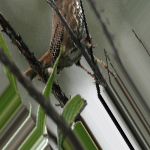


Transformation number: 1



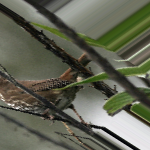


Transformation number: 2



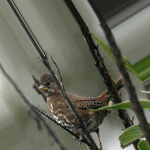


Transformation number: 3



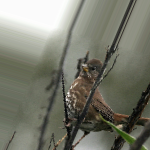

In [64]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img


# Displays transformations on random images of birds in the training partition
def display_transformations(gen):
    train_birds_dir = "tmp/data/train/birds"
    random_index = random.randint(0, len(os.listdir(train_birds_dir)))
    sample_image = load_img(f"{os.path.join(train_birds_dir, os.listdir(train_birds_dir)[random_index])}", target_size=(150, 150))
    sample_array = img_to_array(sample_image)
    sample_array = sample_array[None, :]


    for iteration, array in zip(range(4), gen.flow(sample_array, batch_size=1)):
        array = np.squeeze(array)
        img = array_to_img(array)
        print(f"\nTransformation number: {iteration}\n")
        display(img)


# An example of an ImageDataGenerator
sample_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=50,
        width_shift_range=0.25,
        height_shift_range=0.25,
        shear_range=0.2,
        zoom_range=0.25,
        horizontal_flip=True)

display_transformations(sample_gen)

Veamos otro ejemplo más extremo:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Let's look at another more extreme example:


Transformation number: 0



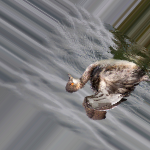


Transformation number: 1



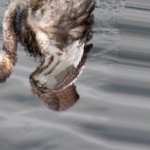


Transformation number: 2



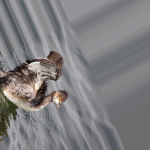


Transformation number: 3



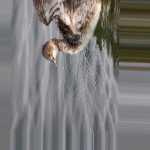

In [65]:
# An ImageDataGenerator with more extreme data augmentation
sample_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=90,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.5,
        zoom_range=0.5,
        vertical_flip=True,
        horizontal_flip=True)

display_transformations(sample_gen)

No dude en probar sus propios ImageDataGenerators personalizados. Los resultados pueden ser muy divertidos de ver. Si revisas los [docs](https://keras.io/api/preprocessing/image/) hay algunos otros parámetros con los que puedes jugar.

Ahora que sabes lo que el aumento de datos hace a las imágenes de entrenamiento, pasemos al entrenamiento:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Feel free to try your own custom ImageDataGenerators! The results can be very fun to watch. If you check the [docs](https://keras.io/api/preprocessing/image/) there are some other parameters you may want to toy with.

Now that you know what data augmentation is doing to the training images let's move onto training:

In [ ]:
# Run only if you want to train the model yourself (this takes around 20 mins with GPU enabled)

augmented_history = augmented_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=80)

Epoch 1/80
100/100 [==============================] - 30s 299ms/step - loss: 1.0064 - sparse_categorical_accuracy: 0.4741 - val_loss: 0.8992 - val_sparse_categorical_accuracy: 0.5590
Epoch 2/80
100/100 [==============================] - 30s 296ms/step - loss: 0.8625 - sparse_categorical_accuracy: 0.5709 - val_loss: 0.7604 - val_sparse_categorical_accuracy: 0.6336
Epoch 3/80
100/100 [==============================] - 30s 299ms/step - loss: 0.8300 - sparse_categorical_accuracy: 0.6050 - val_loss: 0.7924 - val_sparse_categorical_accuracy: 0.6129
Epoch 4/80
100/100 [==============================] - 30s 296ms/step - loss: 0.7926 - sparse_categorical_accuracy: 0.6112 - val_loss: 0.9971 - val_sparse_categorical_accuracy: 0.5496
Epoch 5/80
100/100 [==============================] - 30s 295ms/step - loss: 0.7878 - sparse_categorical_accuracy: 0.6212 - val_loss: 0.8562 - val_sparse_categorical_accuracy: 0.5852
Epoch 6/80
100/100 [==============================] - 30s 296ms/step - loss: 0.7463 -

In [66]:
augmented_history = pd.read_csv('/content/history-augmented/history-augmented.csv')
augmented_model = tf.keras.models.load_model('/content/model-augmented')

Como sabes que el desequilibrio de clases ya no es un problema, no es necesario comprobar más métricas en profundidad. 

Vamos a trazar el historial de entrenamiento de inmediato:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Since you know that class imbalance is no longer an issue there is no need to check for more in-depth metrics. 

Let's plot the training history right away:

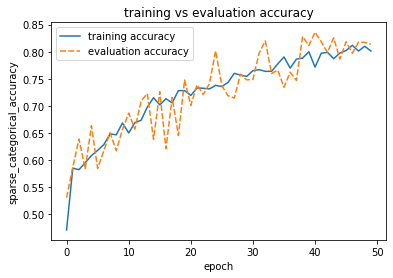

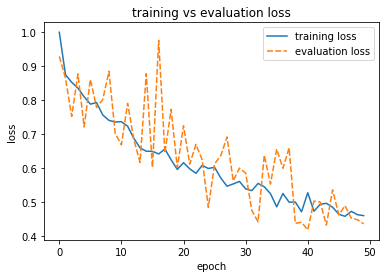

In [67]:
plot_train_eval(augmented_history)

Ahora, la precisión de la evaluación sigue más de cerca la del entrenamiento. Esto indica que **el modelo ya no está sobreajustado**. Se trata de un hallazgo notable, que se consigue con sólo aumentar el conjunto de datos. Otra opción para manejar el sobreajuste es incluir capas de dropout en el modelo, como se ha mencionado anteriormente.

Otro punto que vale la pena mencionar es que este modelo alcanza una precisión de evaluación ligeramente inferior en comparación con el modelo sin aumento de datos. La razón es que este modelo necesita más épocas para entrenarse. Para detectar este problema, comprueba que para el modelo sin aumento de datos, la precisión del entrenamiento alcanzó casi el 100%, mientras que el aumentado aún puede mejorar. 


<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Now, the evaluation accuracy follows more closely the training one. This indicates that **the model is no longer overfitting**. Quite a remarkable finding, achieved by just augmenting the data set. Another option to handle overfitting is to include dropout layers in your model as mentioned earlier.

Another point worth mentioning, is that this model achieves a slightly lower evaluation accuracy when compared to the model without data augmentation. The reason for this, is that this model needs more epochs to train. To spot this issue, check that for the model without data augmentation, the training accuracy reached almost 100%, whereas the augmented one can still improve. 


## Wrapping it up

**Enhorabuena por haber terminado este laboratorio no calificado.** 

Es bastante sorprendente ver cómo los datos por sí solos pueden afectar a los modelos de aprendizaje profundo. Esperamos que este laboratorio te haya ayudado a comprender mejor la importancia de los datos. 

En particular, has descubierto formas de diagnosticar los efectos del desequilibrio de clases y has observado métricas específicas para detectar este problema. Añadir más datos es una forma sencilla de superar el desequilibrio de clases. Sin embargo, esto no siempre es factible en un escenario de la vida real.

En la última sección, se aplicaron múltiples transformaciones geométricas a las imágenes del conjunto de datos de entrenamiento, para generar una versión aumentada. El objetivo era utilizar el aumento de datos para reducir el sobreajuste. Cambiar la arquitectura de la red es un método alternativo para reducir el sobreajuste. En la práctica, es conveniente aplicar ambas técnicas para obtener mejores resultados.


**Siga así.**

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

## Wrapping it up

**Congratulations on finishing this ungraded lab!** 

It is quite amazing to see how data alone can impact Deep Learning models. Hopefully this lab helped you have a better understanding of the importance of data. 

In particular, you figured out ways to diagnose the effects of class imbalance and looked at specific metrics to spot this problem. Adding more data is a simple way to overcome class imbalance. However, this is not always feasible in a real life scenario.

In the final section, you applied multiple geometric transformations to the images in the training dataset, to generate an augmented version. The goal was to use data augmentation to reduce overfitting. Changing the network architecture is an alternative method to reduce overfitting. In practice, it is a good idea to implement both techniques for better results.


**Keep it up!**